# TPOT Practice

Tutorial by Randal S. Olson from https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/tpot-demo/TPOT%20-%20A%20Python%20tool%20for%20automating%20data%20science.ipynb

Modified and commented by Kin

- Using Random Forest Classifier

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

mnist_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/mnist.csv.gz',
                         sep='\t', compression='gzip')
mnist_data.head(10)

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


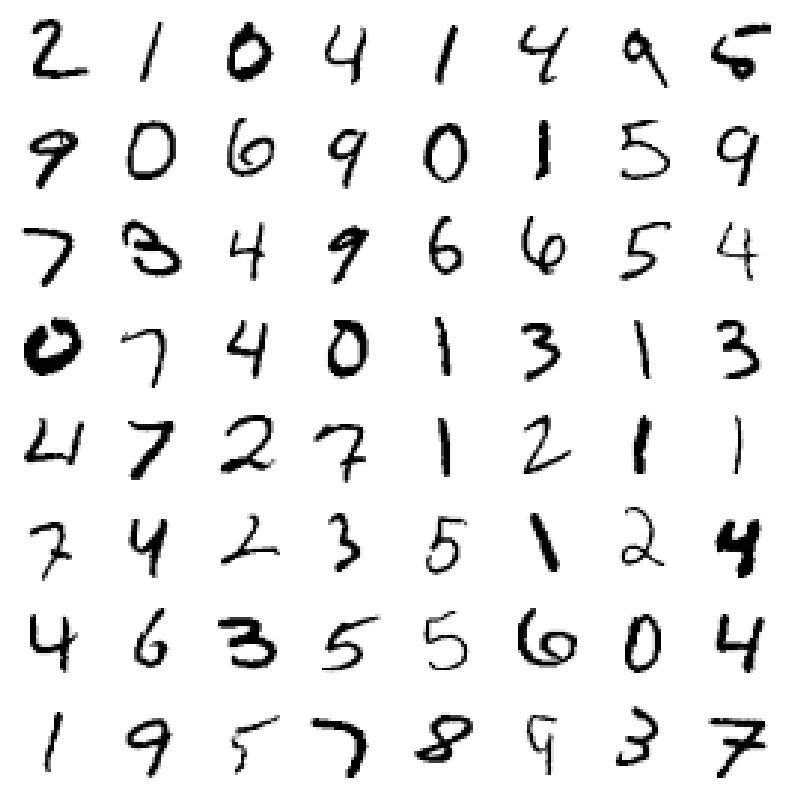

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 8))

for record_num in range(1, 65):
    plt.subplot(8, 8, record_num)
    
    digit_features = mnist_data.iloc[record_num].drop('class').values
    sb.heatmap(digit_features.reshape((28, 28)),
              cmap='Greys',
              square=True, cbar=False,
              xticklabels=[], yticklabels=[])
    
plt.tight_layout()

In [13]:
# Comparing n hyperparameter: estimator (10) = The number of trees in the forest
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=10, n_jobs=-1),
                            X=mnist_data.drop('class', axis=1).values,
                            y=mnist_data.loc[:,'class'].values,
                            cv=10)
print(cv_scores)
print(np.mean(cv_scores))

[ 0.93561742  0.95830954  0.94945745  0.9455792   0.94971429  0.943992
  0.95012861  0.94054595  0.94125214  0.95454545]
0.946914204903


In [14]:
# Comparing n hyperparameter: estimator (100)
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),
                            X=mnist_data.drop('class', axis=1).values,
                            y=mnist_data.loc[:,'class'].values,
                            cv=10)
print(cv_scores)
print(np.mean(cv_scores))

[ 0.96202712  0.9795831   0.9684466   0.96729039  0.96785714  0.96656665
  0.97142041  0.96712877  0.96512293  0.97612922]
0.969157232251
